In [2]:
import pandas as pd 
import numpy as np
df = pd.read_csv("stedent_data.csv") 

print("Sample Rows")
print(df.head())

print("Dataset shape")
print(f'Rows: {df.shape[0]}, Columns: {df.shape[1]}')

print("Dataset info")
print(df.info())

print("Summery Statistics")
print(df.describe(include='all'))

print("missing values")
print(df.isnull().sum())



Sample Rows
   StudyHours  Attendance  PastScore Internet  SleepHours Passed
0           2          60         40        y           5      n
1           5          80         60        n           6      y
2           8          90         75        y           8      y
3           3          70         50        y           5      n
4           7          85         70        n           7      y
Dataset shape
Rows: 20, Columns: 6
Dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StudyHours  20 non-null     int64 
 1   Attendance  20 non-null     int64 
 2   PastScore   20 non-null     int64 
 3   Internet    20 non-null     object
 4   SleepHours  20 non-null     int64 
 5   Passed      20 non-null     object
dtypes: int64(4), object(2)
memory usage: 1.1+ KB
None
Summery Statistics
        StudyHours  Attendance  PastScore Internet  Sl

#### S-2 data Cleaning 


In [8]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("stedent_data.csv") 

print("Missing values in each column")
print(df.isnull().sum())

le =   LabelEncoder()
df['Internet']=le.fit_transform(df["Internet"])
df['Passed']=le.fit_transform(df["Passed"])

print('Data_types after cleaning')
print(df.dtypes)


Missing values in each column
StudyHours    0
Attendance    0
PastScore     0
Internet      0
SleepHours    0
Passed        0
dtype: int64
Data_types after cleaning
StudyHours    int64
Attendance    int64
PastScore     int64
Internet      int64
SleepHours    int64
Passed        int64
dtype: object


classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



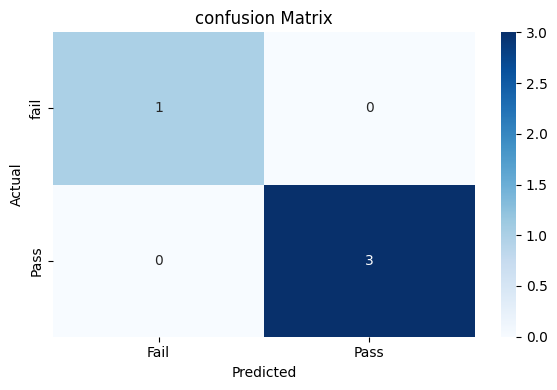

predict your result--------


In [ ]:
#### S-3 Feature scaling 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

#read csv file
df = pd.read_csv("stedent_data.csv") 

#Encode categorical columns
le = LabelEncoder()
df['Internet'] = le.fit_transform(df["Internet"])
df['Passed'] = le.fit_transform(df["Passed"])

# Define Features (Removed 'Passed' from features)
features = ['StudyHours', 'Attendance', 'PastScore', 'SleepHours']

# scale the features
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])

# S-4 

#Split the data
X = df_scaled[features] #features
y = df_scaled['Passed'] #target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

#Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

#capitalization
print("classification report")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))

#heatmap
sns.heatmap(conf_matrix, annot=True, fmt ="d", cmap = "Blues", xticklabels = ["Fail", "Pass"], yticklabels = ["fail", "Pass"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("confusion Matrix")
plt.tight_layout()
plt.show()

# predicting new input 
print("predict your result--------")
try:
    study_hours = float(input("Enter Study_hours"))
    attendance = float(input("Enter attendance"))
    past_score = float(input("Enter past score"))
    sleep_hours = float(input("Enter sleep hours"))

    
    user_input_df = pd.DataFrame([{
        'StudyHours': study_hours,
        'Attendance':attendance,
        'PastScore':past_score,
        'SleepHours':sleep_hours}])

    user_input_scaled = scaler.transform(user_input_df)

    prediction = model.predict(user_input_scaled)[0]

    result = "Pass haha" if prediction == 1 else "fail oooo :( "
    print(f"prediction Based on input:{result}")
except Exception as e:
    print(" An error occured", e)
        

    